In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import pos_tag, ne_chunk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import contractions
import re
import string
import time
from emoji import UNICODE_EMOJI

In [87]:
pd.read_csv("./data/postcounter.csv")['date'].unique()

array(['Jan20', 'Feb20', 'Mar20', 'Apr20', 'May20', 'Jun20', 'Jul20',
       'Aug20', 'Sep20', 'Oct20', 'Nov20', 'Dec20', 'Jan21', 'Feb21',
       'Mar21', 'Apr21', 'May21', 'Jun21', 'Jul21', 'Aug21', 'Sep21',
       'Oct21'], dtype=object)

In [142]:
data = pd.read_csv("./data/gme_dailythreads.csv", index_col = 0, parse_dates = ['datetime'])
maxdate = data.datetime.max()

In [131]:
print(data.sort_values("pct_mention",ascending = False).iloc[:10,[0,1,2,3,5,8,9,10]].to_latex(index=False))
# data.sort_values("pct_mention",ascending = False).iloc[:10,[0,2,3,5,8,9,10]]

\begin{tabular}{lllrrrrr}
\toprule
           datetime &      id &                                            title &  score &  num\_comments &  pct\_mention &  NumberOfMentions &  NumberOfComments \\
\midrule
2021-01-14 19:00:18 &  kx3ja5 &     Daily Discussion Thread for January 14, 2021 &    900 &         45983 &     0.695747 &               638 &               917 \\
2021-01-15 19:00:14 &  kxsd2p &     Daily Discussion Thread for January 15, 2021 &    899 &         49768 &     0.643469 &               601 &               934 \\
2021-01-13 19:00:16 &  kwe7q7 &     Daily Discussion Thread for January 13, 2021 &    634 &         39431 &     0.559662 &               530 &               947 \\
2021-01-25 05:00:18 &  l47hgm &   What Are Your Moves Tomorrow, January 25, 2021 &   1795 &         38241 &     0.439394 &               406 &               924 \\
2021-01-14 05:00:14 &  kwps6l &   What Are Your Moves Tomorrow, January 14, 2021 &    624 &         27098 &     0.420652 &            

# Reddit Posts Sample
## Most upvoted January Posts Example

In [101]:
janpost = pd.read_csv("./data/gmeposts_jan.csv", index_col = [0], parse_dates=['datetime'])

In [110]:
print(janpost.sort_values("num_comments",ascending = False).head(10).to_latex(index = False))

\begin{tabular}{lrllrlrl}
\toprule
                                             title &  score &      id &       subreddit &  num\_comments &                                               body &       created &            datetime \\
\midrule
 The GME Afterhours Thread: Part 4.20 on 27 Jan... &  27604 &  l6er79 &  wallstreetbets &         94621 &  Stop spamming copy pastes you boomers. Instaba... &  1.611812e+09 & 2021-01-28 05:26:35 \\
        The GME Thread Part 1 for January 26, 2021 &  14456 &  l5c0nr &  wallstreetbets &         93889 &  Good luck today. [Here's some WSB stats.](http... &  1.611689e+09 & 2021-01-26 19:16:56 \\
 GME Thoughts, YOLOs, Gains, Stonk Updates, 🚀🚀🚀... &  18418 &  l4lmrx &  wallstreetbets &         93756 &  Thanks all for the quick rise to max comments ... &  1.611601e+09 & 2021-01-25 18:56:35 \\
 GMREEEEEEEEEEEE Containment Thread - GME shitp... &  14770 &  l2ljpt &  wallstreetbets &         93388 &  Don't be doxxing citron or anyone else. That's... &  1.6

In [112]:
print(janpost.sort_values("score",ascending = False).head(10).to_latex(index=False, na_rep=""))

\begin{tabular}{lrllrlrl}
\toprule
                                             title &  score &      id &       subreddit &  num\_comments &                                               body &       created &            datetime \\
\midrule
                     GME YOLO update — Jan 22 2021 &  91199 &  l2x7he &  wallstreetbets &          6332 &                                                    &  1.611379e+09 & 2021-01-23 05:14:08 \\
 Honorary WSB Autist award goes to Chamath Pali... &  82970 &  l69jz5 &  wallstreetbets &          2696 &                                                    &  1.611797e+09 & 2021-01-28 01:23:12 \\
                     GME YOLO update — Jan 25 2021 &  81959 &  l4xje1 &  wallstreetbets &          5514 &                                                    &  1.611638e+09 & 2021-01-26 05:05:36 \\
 Can I get a flair for buying GME at the litera... &  58019 &  l4sg3u &  wallstreetbets &          4153 &                                                    &  1.6

----
----
----
# Text Analysis - Whole Sample

In [36]:
%load_ext autoreload
%autoreload 1
%aimport sentiment
from sentiment import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
sentiment = TextAnalysis('./data/submissions_merged.csv')

In [39]:
stopgme.extend(['gamestop'])

In [40]:
sentiment.process_data('title', stopgme, emoji = False)
sentiment.get_WordFrequency()
sentiment.get_PorterFrequency()
sentiment.getNgrams(n = 2)

string index out of range


[(('let', 'us'), 12607),
 (('short', 'squeeze'), 5059),
 (('short', 'interest'), 3837),
 (('us', 'go'), 2876),
 (('hedge', 'funds'), 2471)]

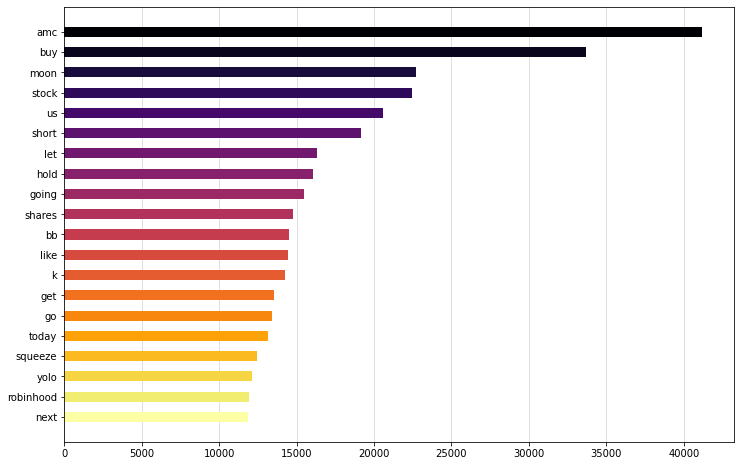

In [166]:
fig, ax = plt.subplots(figsize = (12,8))
data = sentiment.word_freq.most_common(20)

cmap = [plt.get_cmap('inferno')(i) for i in np.linspace(1,0, len(data))]
for item, col in zip(data[::-1], cmap):
    word, count = item
    ax.barh(y=word, width = count, height = .5, color = col,zorder=2)
ax.grid(axis = "x", alpha = 0.5,zorder = 0)
plt.show()

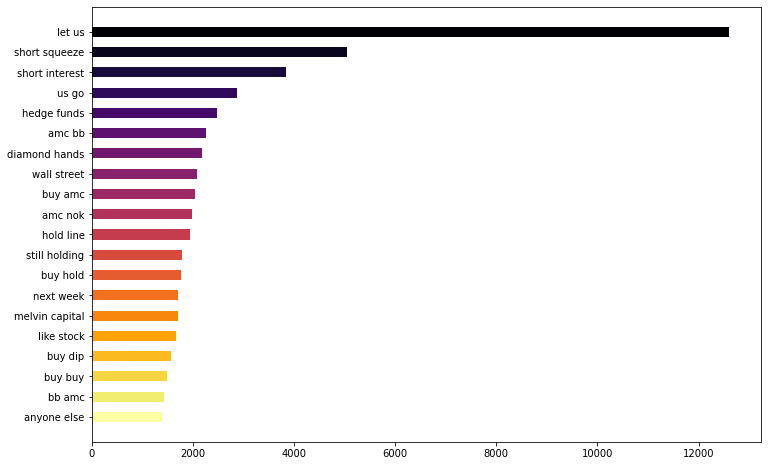

In [168]:
fig, ax = plt.subplots(figsize = (12,8))
data = FreqDist(sentiment.bigrams).most_common(20)

cmap = [plt.get_cmap('inferno')(i) for i in np.linspace(1,0, len(data))]

for item, col in zip(data[::-1], cmap):
    word, count = item
    word = " ".join(word)
    ax.barh(y=word, width = count, height = .5, color = col)
plt.show()

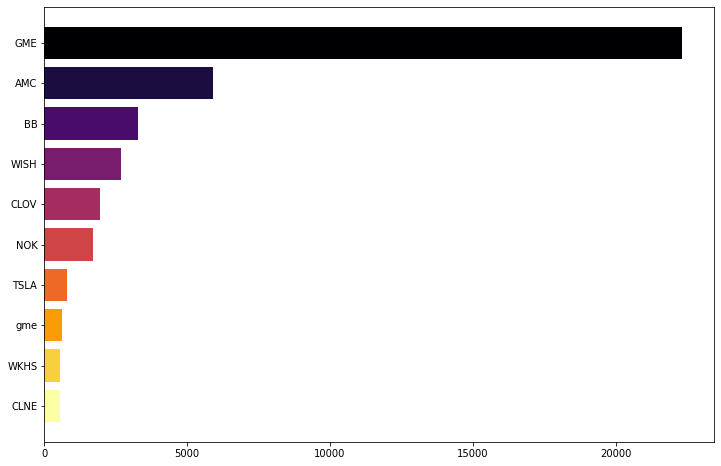

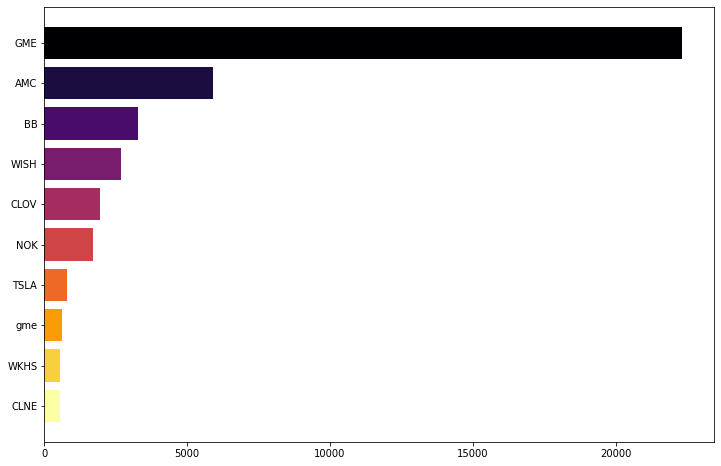

In [186]:
sentiment.get_TickerMentions(plot = True, cmap = "inferno")

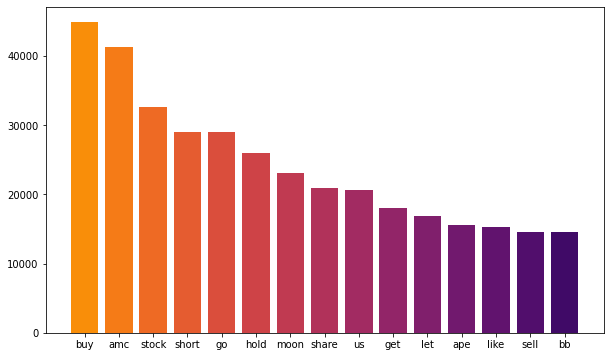

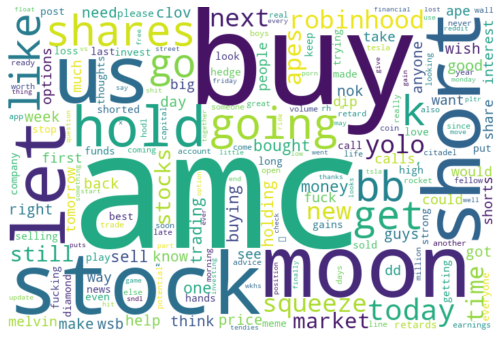

In [59]:
# sub_apr.freq_plot(top = 15)
fig, ax = plt.subplots(figsize = (10,6))
data = sentiment.word_freq.most_common(20)
cmap = [plt.get_cmap('inferno')(i) for i in np.linspace(0.75,0, len(data))]

for item, col in zip(data, cmap):
    word, count = item
    ax.bar(x = word, height = count, width = .8, color = col)

ax.set_xlabel('Word')
ax.set_ylabel('Frequency')

plt.close()
fig, ax = plt.subplots(figsize = (10,6))
data = sentiment.porter_freq.most_common(15)

for item, col in zip(data, cmap):
    word, count = item
    ax.bar(x = word, height = count, width = .8, color = col)


sentiment.wordcloud(stopgme)

plt.show()

---
---

## Named Entity Recognition

In [52]:
org = sentiment.chunking_NER('title','ORGANIZATION')

TypeError: expected string or bytes-like object

In [ ]:
org.plot(20)

In [ ]:
sentiment.getNgrams(n=3)

## Collocation

In [ ]:
sentiment.get_Collocations(freq_limit = 3, method = 'likelihood')

In [11]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(sub_apr.processed_data.tokens_list)
len(finder.score_ngrams(bigram_measures.raw_freq))
finder.apply_word_filter(lambda w: w in ('rocket','rocket'))
finder.apply_freq_filter(3)
len(finder.score_ngrams(bigram_measures.raw_freq))
scored = finder.score_ngrams(bigram_measures.raw_freq)
pd.DataFrame(scored, columns = ['bigram', 'freq'])['freq'].diff().max()
pd.DataFrame(scored, columns = ['bigram', 'freq']).set_index('bigram').iloc[:5]

,freq
bigram,
"(let, us)",0.003661
"(short, squeeze)",0.002038
"(gem_stone, raising_hands)",0.001959
"(gorilla, gorilla)",0.001923
"(gem_stone, gem_stone)",0.001358
